In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Sleep_Efficiency.csv')
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [3]:
df.drop('ID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    object 
 2   Bedtime                 452 non-null    object 
 3   Wakeup time             452 non-null    object 
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              432 non-null    float64
 10  Caffeine consumption    427 non-null    float64
 11  Alcohol consumption     438 non-null    float64
 12  Smoking status          452 non-null    object 
 13  Exercise frequency      446 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory 

In [4]:
df.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [5]:
df.isna().sum() #Detect missing values

Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [6]:
df['Awakenings'].fillna(df['Awakenings'].mean(), inplace=True)
df['Caffeine consumption'].fillna(0.0, inplace=True)
df['Alcohol consumption'].fillna(0.0, inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].mean(), inplace=True)
df.isna().sum() #Detect missing values

Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [7]:
# Convert   2021-03-06 01:30:00     ->      1.5
df['Bedtime'] = pd.to_datetime(df['Bedtime']).dt.hour + pd.to_datetime(df['Bedtime']).dt.minute / 60
df['Wakeup time'] = pd.to_datetime(df['Wakeup time']).dt.hour + pd.to_datetime(df['Wakeup time']).dt.minute / 60

In [8]:
df['Gender']=df['Gender'].replace({'Male':0, 'Female':1})
df["Smoking status"] = df["Smoking status"].replace({"Yes": 1, "No": 0})

In [9]:
df.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,1,1.0,7.0,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,69,0,2.0,9.0,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,40,1,21.5,5.5,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,40,1,2.5,8.5,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,57,0,1.0,9.0,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0


<Axes: xlabel='Awakenings'>

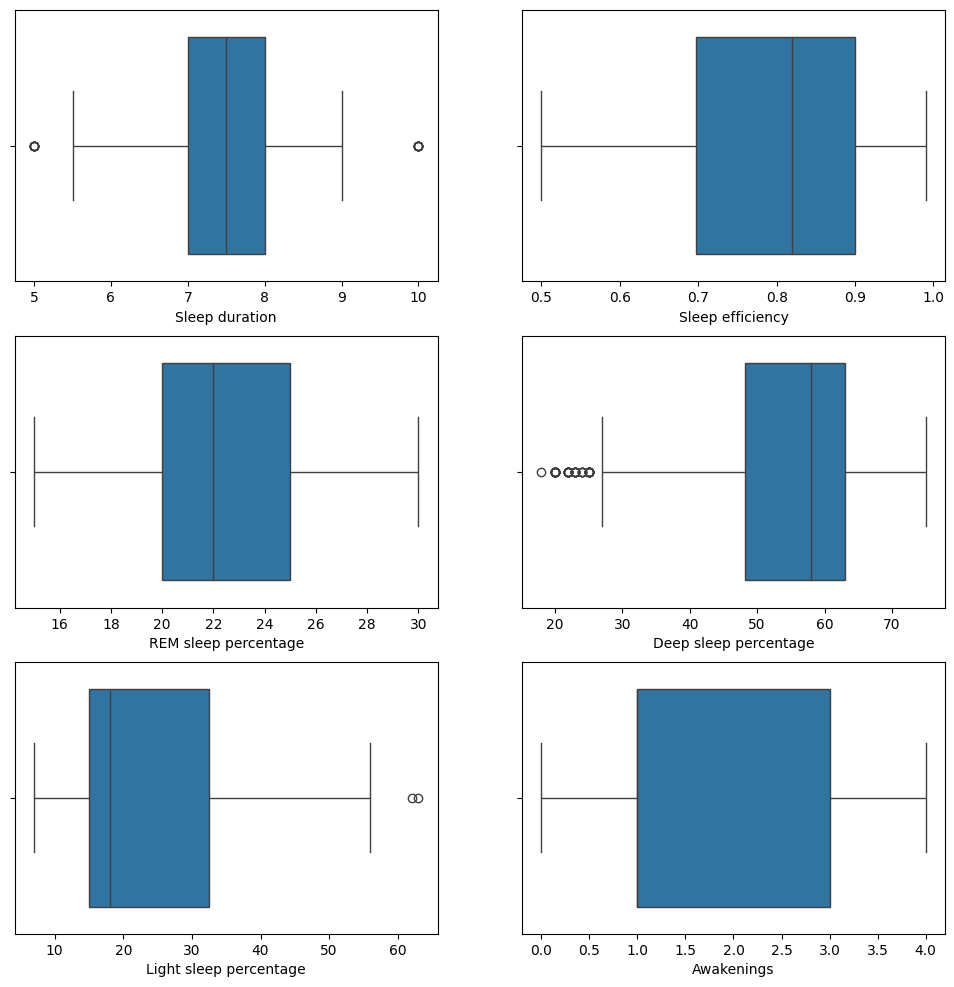

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
sns.boxplot(data=df, x='Sleep duration')

plt.subplot(3, 2, 2)
sns.boxplot(data=df, x='Sleep efficiency')

plt.subplot(3, 2, 3)
sns.boxplot(data=df, x='REM sleep percentage')

plt.subplot(3, 2, 4)
sns.boxplot(data=df, x='Deep sleep percentage')

plt.subplot(3, 2, 5)
sns.boxplot(data=df, x='Light sleep percentage')

plt.subplot(3, 2, 6)
sns.boxplot(data=df, x='Awakenings')

<Axes: xlabel='Exercise frequency'>

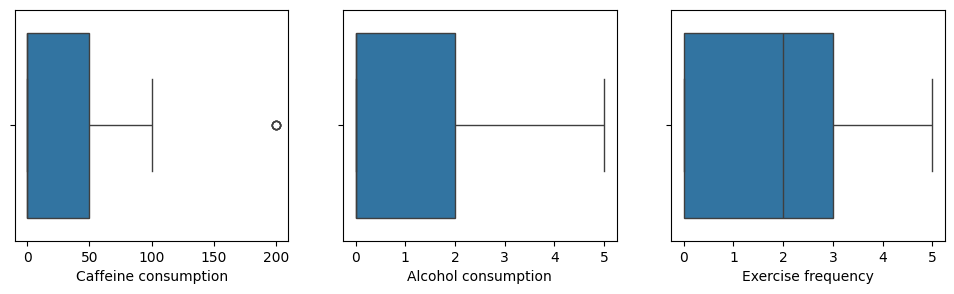

In [11]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Caffeine consumption')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Alcohol consumption')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Exercise frequency')


<Axes: xlabel='Caffeine consumption'>

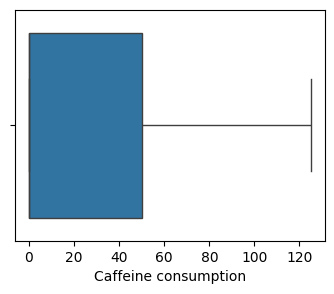

In [12]:
def handle_outliers(data, column):
    q1 = data[column].quantile(0.25) # Определение 25% процентиль
    q3 = data[column].quantile(0.75) # Определение 75% процентиль
    iqr = q3 - q1 # Определение размера ящика
    lower_whisker = q1 - 1.5 * iqr # Определение нижнего усика
    upper_whisker = q3 + 1.5 * iqr # Определение верхнего усика
    # Вариант 1: Замена выбросов значениями границ усов (если точки находятся за пределами усов, то тогда заменяем их на граничные значения усов)
    data[column] = data[column].apply(lambda x: lower_whisker if x < lower_whisker else (upper_whisker if x > upper_whisker else x))

handle_outliers(df, 'Caffeine consumption')

plt.figure(figsize=(4, 3))
sns.boxplot(data=df, x='Caffeine consumption')

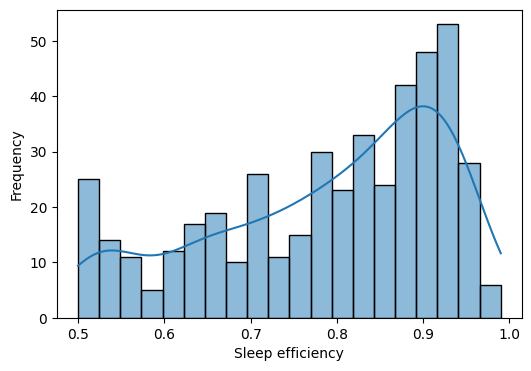

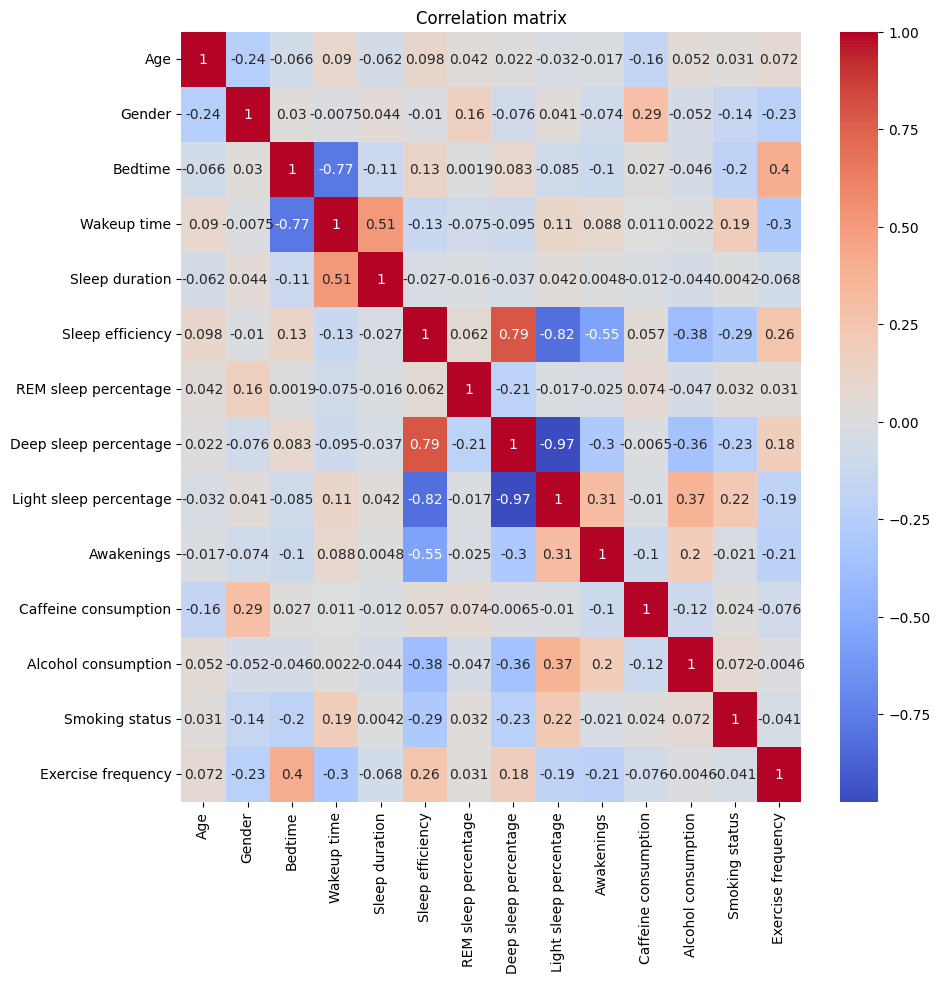

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Sleep efficiency"], kde=True, bins=20)
plt.xlabel("Sleep efficiency")
plt.ylabel("Frequency")
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

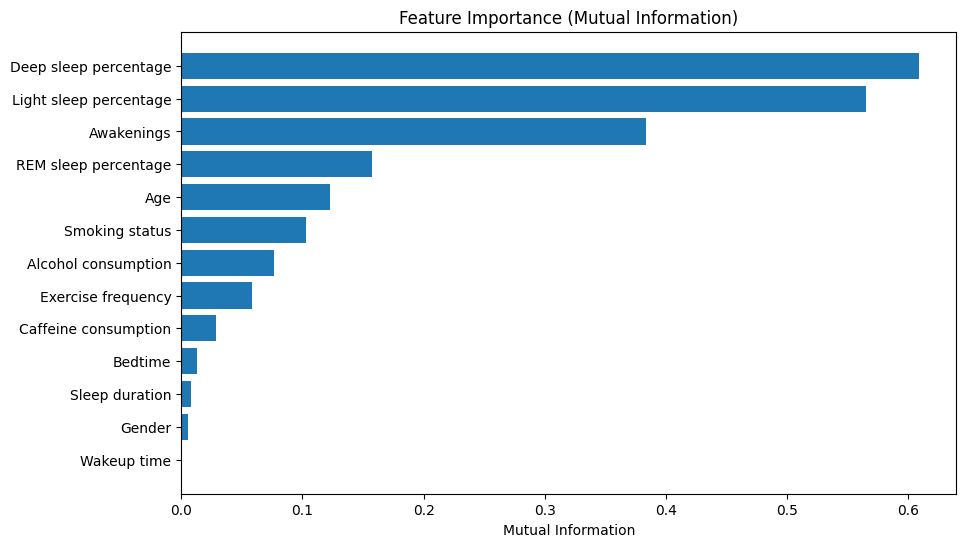

In [14]:
from sklearn.feature_selection import mutual_info_regression

x = df.drop('Sleep efficiency', axis=1)
y = df['Sleep efficiency']
# Вычисление важности признаков с использованием mutual information на ваших данных X_train и y_train 
mutual_info = mutual_info_regression(x, y, random_state=42)
# Создание DataFrame для отображения результатов
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': mutual_info})
# Сортировка по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Mutual Information')
plt.title('Feature Importance (Mutual Information)')
plt.show()


In [15]:
#as deep sleep and light sleep has high negative correlation light sleep will be dropped
df = df.drop('Light sleep percentage',axis=1)

#dropping columns which has low importance
df = df.drop(['Gender','Bedtime','Wakeup time','Sleep duration','Exercise frequency'],axis=1)

df.head()

,Age,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status
0,65,0.88,18,70,0.0,0.0,0.0,1
1,69,0.66,19,28,3.0,0.0,3.0,1
2,40,0.89,20,70,1.0,0.0,0.0,0
3,40,0.51,23,25,3.0,50.0,5.0,1
4,57,0.76,27,55,3.0,0.0,3.0,0


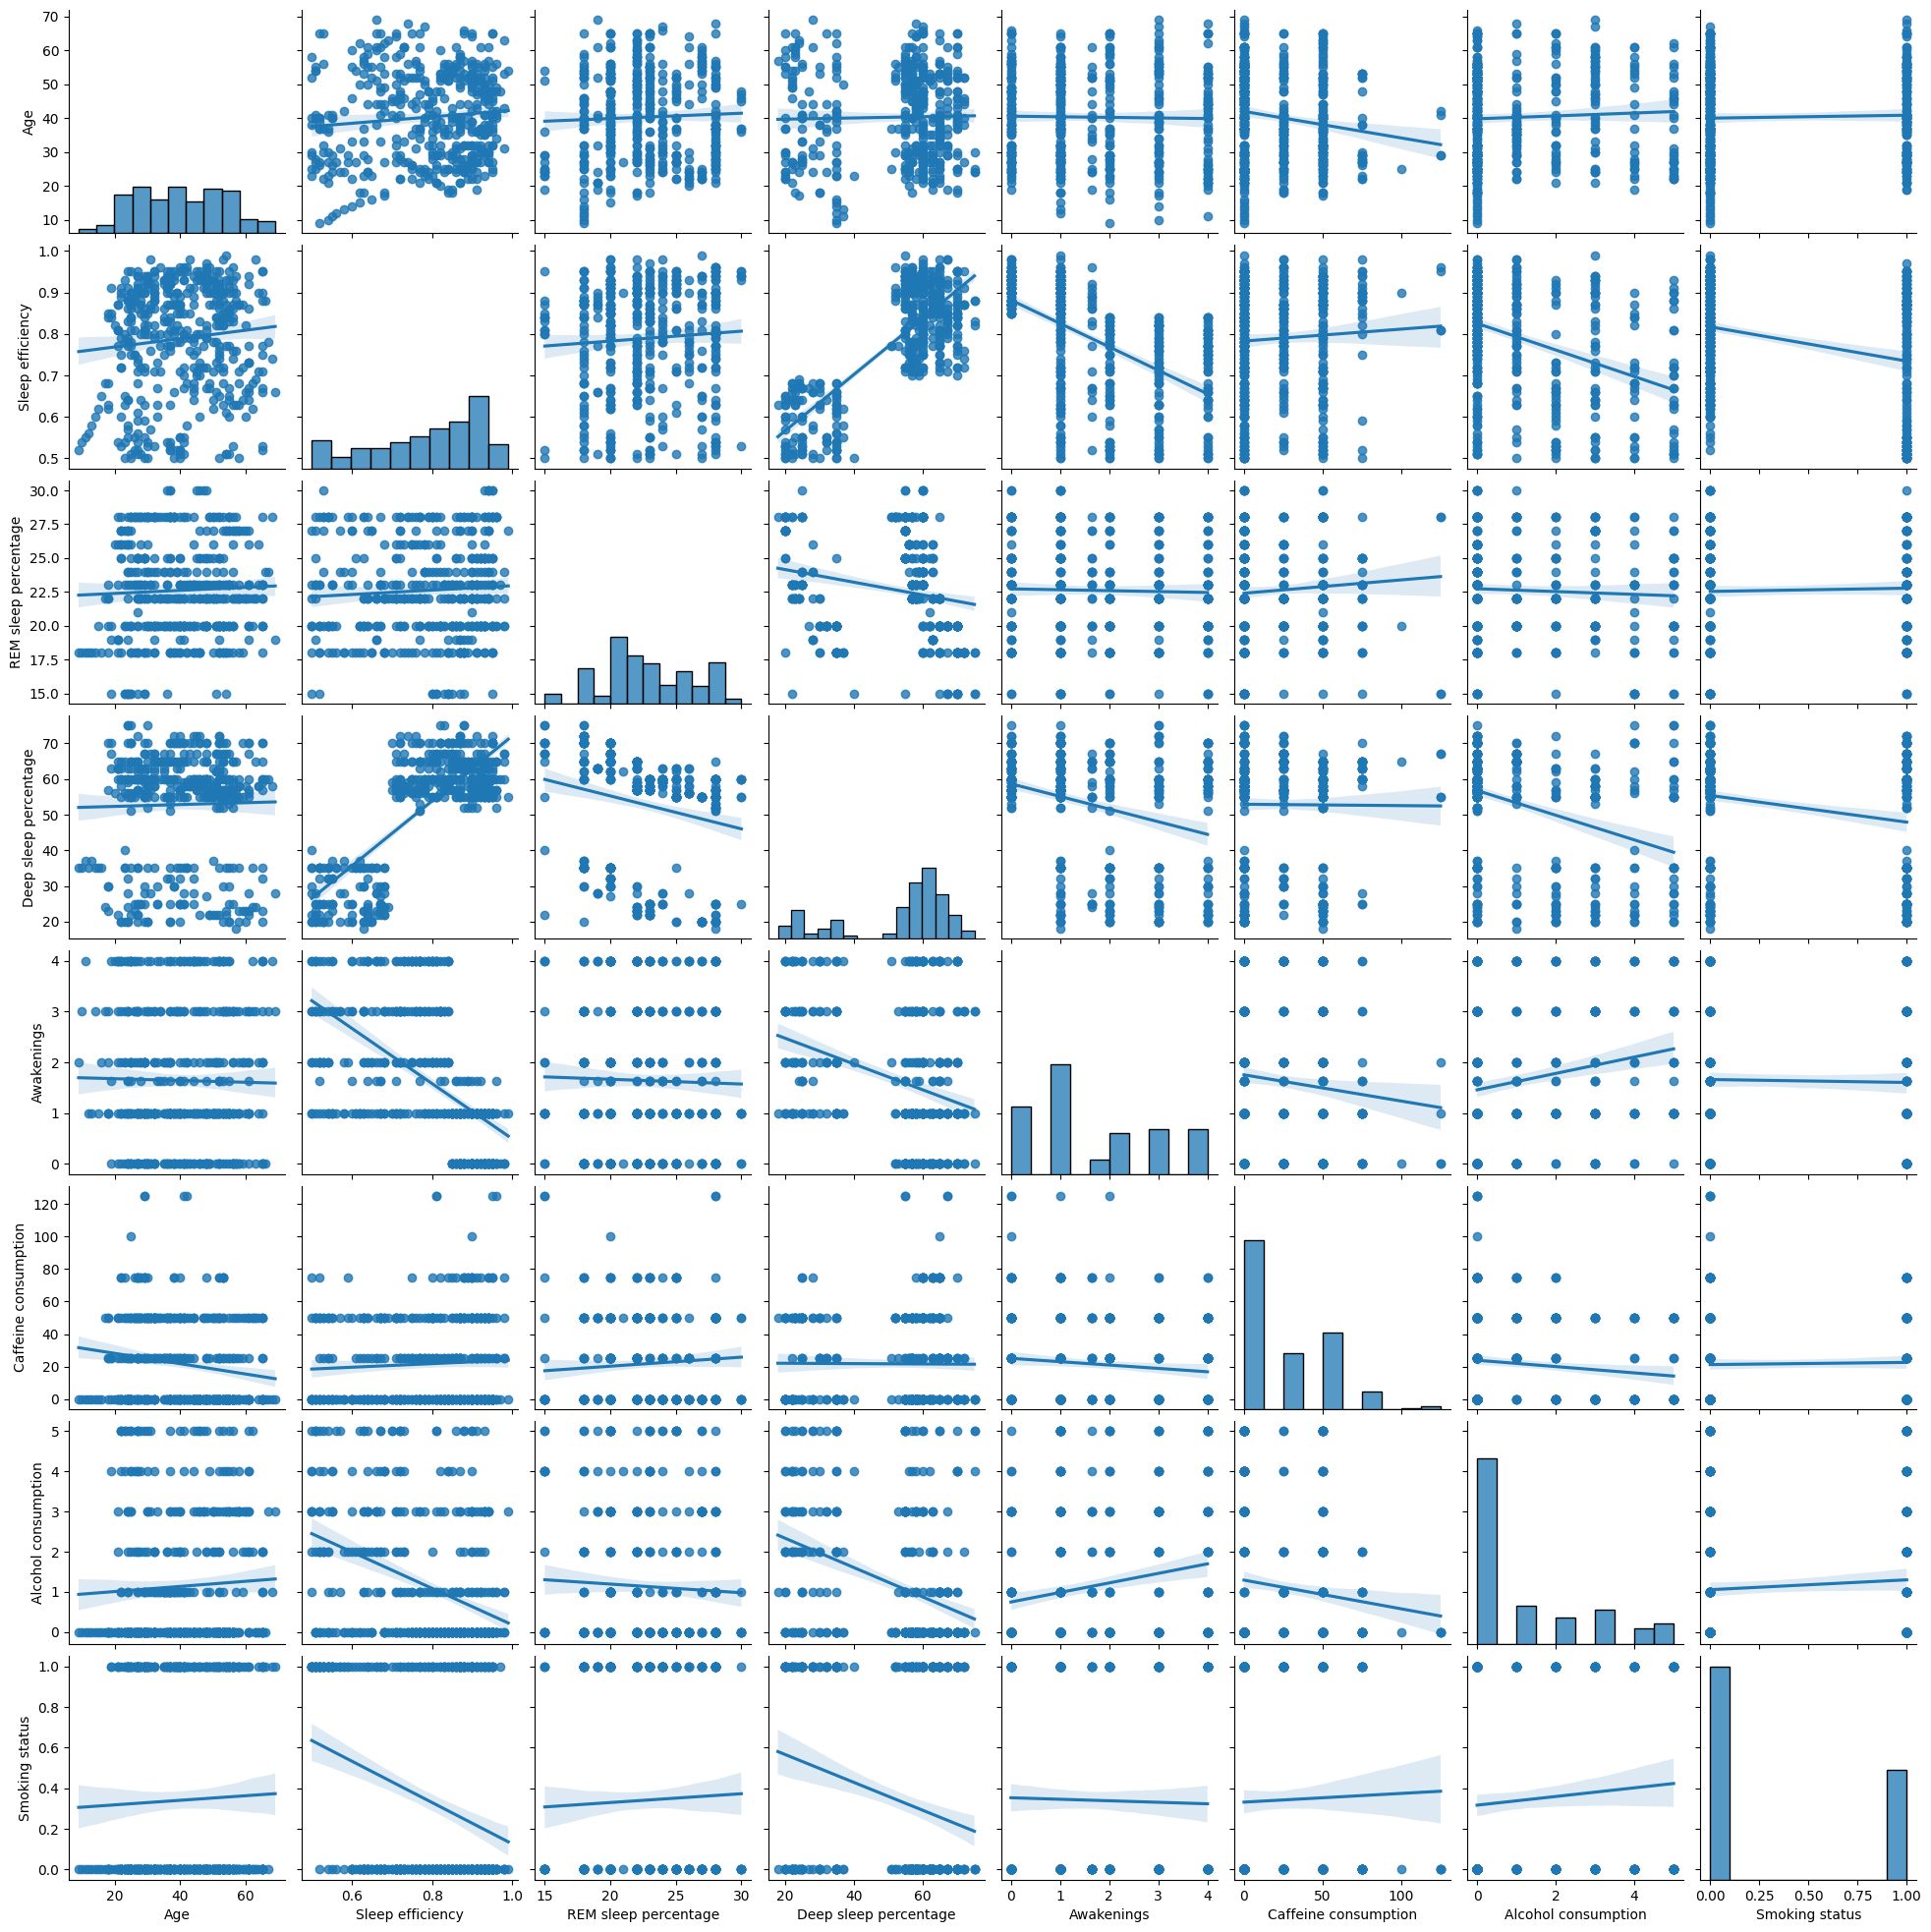

In [16]:
sns.pairplot(df, kind="reg") 

In [17]:
from sklearn.preprocessing import StandardScaler

scaler_linear = StandardScaler()

x = df.drop('Sleep efficiency', axis=1)
y = df['Sleep efficiency']
# Compute the mean and standard deviation of the training set then transform it
x = scaler_linear.fit_transform(x)
x


array([[ 1.87834171, -1.31032529,  1.09849019, ..., -0.81803119,
        -0.7075649 ,  1.39106611],
       [ 2.18234688, -1.02640054, -1.58746264, ..., -0.81803119,
         1.15908491,  1.39106611],
       [-0.02169063, -0.74247579,  1.09849019, ..., -0.81803119,
        -0.7075649 , -0.71887309],
       ...,
       [-0.02169063, -0.74247579, -1.33165761, ..., -0.81803119,
         1.15908491,  1.39106611],
       [ 0.35831583, -1.31032529,  1.22639271, ..., -0.81803119,
        -0.7075649 , -0.71887309],
       [-1.6937191 , -0.17462629, -1.90721893, ...,  1.0684489 ,
        -0.7075649 , -0.71887309]])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=50)

In [19]:
result = pd.DataFrame({'Model':[], 'Accuracy':[], 'MSE':[], 'MAE':[], 'R2':[]})

In [20]:
def test_model(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Feed the scaled training set and get the predictions
    y_hat = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    test_mse = mean_squared_error(y_test, y_hat)
    test_mae = mean_absolute_error(y_test, y_hat)
    test_r2 = r2_score(y_test,y_hat)
    return accuracy, test_mse, test_mae, test_r2

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = []
linear = LinearRegression()
decision_tree = DecisionTreeRegressor()
rendom_forest = RandomForestRegressor()
svr = SVR()
k_neighbors = KNeighborsRegressor()
mlp = MLPRegressor()
gradient_boosting = GradientBoostingRegressor()
models.append(linear)
models.append(decision_tree)
models.append(rendom_forest)
models.append(svr)
models.append(k_neighbors)
models.append(mlp)
models.append(gradient_boosting)

for model in models:
    accuracy, test_mse, test_mae, test_r2 = test_model(model, x_train, y_train, x_test, y_test)
    result.loc[len(result.index)] = [str(model), accuracy, test_mse, test_mae, test_r2] 



In [22]:
result.sort_values(by=['MSE', 'MAE'])

,Model,Accuracy,MSE,MAE,R2
6,GradientBoostingRegressor(),0.876341,0.002247,0.036933,0.876341
2,RandomForestRegressor(),0.864687,0.002458,0.039608,0.864687
0,LinearRegression(),0.787873,0.003854,0.051228,0.787873
4,KNeighborsRegressor(),0.780616,0.003986,0.047416,0.780616
3,SVR(),0.760233,0.004356,0.055493,0.760233
1,DecisionTreeRegressor(),0.716486,0.005151,0.052965,0.716486
5,MLPRegressor(),0.330941,0.012155,0.085084,0.330941


In [23]:
import torch
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [25]:
x_train = torch.tensor(x_train).float().to(device)
x_test = torch.tensor(x_test).float().to(device)
y_train = torch.tensor(y_train.to_numpy()).float().to(device)
y_test = torch.tensor(y_test.to_numpy()).float().to(device)

In [26]:
class NN(nn.Module):
    def __init__(self, input):
        super(NN, self).__init__()
        self.fc1 = nn.Sequential(nn.Linear(input, round(input)),
                                 nn.LeakyReLU(),
                                 nn.Linear(round(input), round(input / 2)),
                                 nn.LeakyReLU(),
                                 nn.Linear(round(input / 2), round(input / 2)),
                                 nn.LeakyReLU(),
                                 nn.Linear(round(input / 2), round(input / 4)),
                                 nn.LeakyReLU(),
                                 nn.Linear(round(input / 4), 1))

    def forward(self, x):
        x = self.fc1(x)
        return x

In [27]:
model_nn = NN(len(x_train[0]))
model_nn.to(device)

NN(
  (fc1): Sequential(
    (0): Linear(in_features=7, out_features=7, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=7, out_features=4, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=4, out_features=4, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=4, out_features=2, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=2, out_features=1, bias=True)
  )
)

In [28]:
optimizer = Adam(params=model_nn.parameters(), lr=1e-3)
loss_func = nn.MSELoss()

In [29]:
num_iter = 1000
losses = []
train_loop = tqdm(range(num_iter))
train_loop.set_description_str("Model training")
for i in train_loop:
    outputs = model_nn(x_train)
    loss = loss_func(outputs, y_train)
    losses.append(loss.item())
    train_loop.set_postfix_str(f"Current error = {loss.item()}")
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Model training:   0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\das-s\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([339])) that is different to the input size (torch.Size([339, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Model training: 100%|██████████| 1000/1000 [00:02<00:00, 452.70it/s, Current error = 0.01887805014848709]


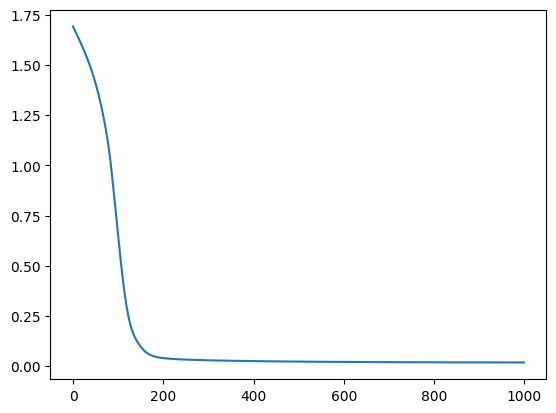

In [30]:
plt.plot(losses)

In [31]:
import random 
j = random.randint(0, len(y_test))
for i in range(7):
    print(df.columns.drop(['Sleep efficiency'])[i], x_test[j][i].item())

print(f"\nReal sleep efficiency = {y_test[j].item()}")
print(f"Predicted sleep efficiency = {model_nn(x_test[j]).item()}")

Age -1.3137125968933105
REM sleep percentage -2.162099599838257
Deep sleep percentage 0.7787339091300964
Awakenings 1.7803984880447388
Caffeine consumption 2.0116889476776123
Alcohol consumption -0.7075648903846741
Smoking status -0.7188730835914612

Real sleep efficiency = 0.800000011920929
Predicted sleep efficiency = 0.7707550525665283


In [32]:
results = model_nn(x_test).cpu().detach().numpy()
y_real = y_test.cpu().detach().numpy()
mse = mean_squared_error(y_real, results)
mae = mean_absolute_error(y_real, results)

print(f"mse =\t{mse}\nmae =\t{mae}")

mse =	0.01942558027803898
mae =	0.11797261238098145
